In [39]:
#Dependenceis

from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
from spotipy import util
import sys
from pprint import pprint
from config import cid
from config import secret
import pandas as pd
import matplotlib.pyplot as plt

#import set client id and secret key
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Data Sources

We imported data a list of tracks from spotify's top 100 list in canada and used track information from spotify's API.

In [7]:
top_100_songs_CA_csv = pd.read_csv('Resources/regional-ca-daily-latest.csv', header = 1)

top_100_songs_CA = pd.DataFrame(top_100_songs_CA_csv)

top_100_songs_CA.head()

,Position,Track Name,Artist,Streams,URL
0,1,The Box,Roddy Ricch,243040,https://open.spotify.com/track/0nbXyq5TXYPCO7p...
1,2,Dance Monkey,Tones and I,188427,https://open.spotify.com/track/1rgnBhdG2JDFTbY...
2,3,Intentions (feat. Quavo),Justin Bieber,187172,https://open.spotify.com/track/4umIPjkehX1r7uh...
3,4,Blinding Lights,The Weeknd,186165,https://open.spotify.com/track/0sf12qNH5qcw8qp...
4,5,P2,Lil Uzi Vert,172936,https://open.spotify.com/track/3kW4z2pIj5VY5fL...


In [53]:
#Get json output of a track
urn = 'spotify:track:0nbXyq5TXYPCO7pr3N8S4I'
url = 'https://open.spotify.com/track/0nbXyq5TXYPCO7pr3N8S4I'
#sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

track = sp.track(url)
#audio_analysis = sp.audio_analysis(url)
audio_feature = sp.audio_features(url)
#pprint(track)

# Create Dataframe of needed information

In [33]:
sample = top_100_songs_CA[:50].copy()

In [71]:
dictionary = {}
dictionary['Duration'] = []
dictionary['Popularity'] = []
dictionary['Track Name'] = []
dictionary['Artist Name'] = []
dictionary['Tempo'] = []
dictionary['Valence'] = []
dictionary['Speechiness'] = []
dictionary['Danceability'] = []


for i,x in top_100_songs_CA.iterrows():
    url = top_100_songs_CA.loc[i,'URL']
    track = sp.track(url)
    audio_features = sp.audio_features(url)
    dictionary['Duration'].append(track['duration_ms'])
    dictionary['Popularity'].append(track['popularity'])
    dictionary['Track Name'].append(track['name'])
    dictionary['Artist Name'].append(track['album']['artists'][0]['name'])
    dictionary['Tempo'].append(audio_features[0]['tempo'])
    dictionary['Valence'].append(audio_features[0]['valence'])
    dictionary['Speechiness'].append(audio_features[0]['speechiness'])
    dictionary['Danceability'].append(audio_features[0]['danceability'])
    

retrying ...3secs
retrying ...2secs


In [72]:
df = pd.DataFrame(dictionary)
streams = top_100_songs_CA['Streams']
df['Streams'] = streams
df.head()
#print(len(df))
#df.tail()

,Duration,Popularity,Track Name,Artist Name,Tempo,Valence,Speechiness,Danceability,Streams
0,196652,99,The Box,Roddy Ricch,116.971,0.642,0.0559,0.896,243040
1,209754,76,Dance Monkey,Tones and I,98.078,0.540,0.0988,0.825,188427
2,212866,89,Intentions (feat. Quavo),Justin Bieber,147.986,0.874,0.0575,0.806,187172
3,201573,100,Blinding Lights,The Weeknd,171.017,0.345,0.0629,0.513,186165
4,234626,82,P2,Lil Uzi Vert,155.086,0.490,0.1930,0.775,172936


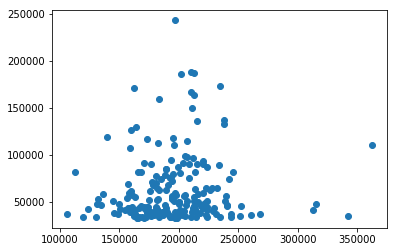

In [64]:
plt.scatter(df['Duration'], df['Streams'])

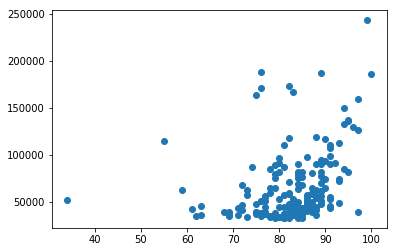

In [65]:
plt.scatter(df['Popularity'], df['Streams'])

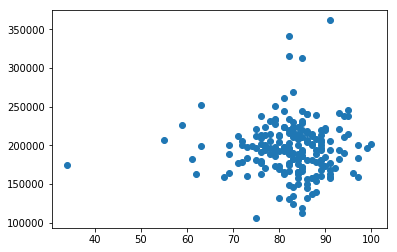

In [66]:
plt.scatter(df['Popularity'], df['Duration'])